# Atividade 1

In [40]:
import pandas as pd

In [41]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'

dados = pd.read_csv(url)
dados.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [42]:
dados.tail()

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


In [43]:
dados.shape

(18, 4)

In [44]:
dados.columns

Index(['Nome', 'Idade', 'Notas', 'Aprovado'], dtype='object')

In [45]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


In [46]:
dados.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


# Atividade 2

In [47]:
#  Calcular a média de quartos dos imóveis;

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
df_imoveis = pd.read_csv(url, sep = ';')
df_imoveis.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [48]:
media_quartos = df_imoveis.groupby('Tipo')['Quartos'].mean()
media_quartos

,Quartos
Tipo,
Apartamento,2.481569
Box/Garagem,0.060976
Casa,3.133402
Casa Comercial,1.562264
Casa de Condomínio,4.007028
Casa de Vila,1.927711
Chácara,3.000000
Conjunto Comercial/Sala,0.040939
Flat,1.415966


In [49]:
# Conferir quantos bairros únicos existem na nossa base de dados

# bairros_unicos = df_imoveis.Bairro.unique()
# bairros_unicos

df_imoveis['Bairro'].nunique()

162

In [50]:
# Analisar quais bairros possuem a média de valor de aluguel mais elevadas

media_bairros = df_imoveis.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False)
media_bairros.head()

,Valor
Bairro,
Jacarepaguá,314143.489637
Irajá,154610.470588
Caju,120264.782609
Vasco da Gama,120000.000000
Cidade Nova,88166.692308


<Axes: xlabel='Médias', ylabel='Bairros'>

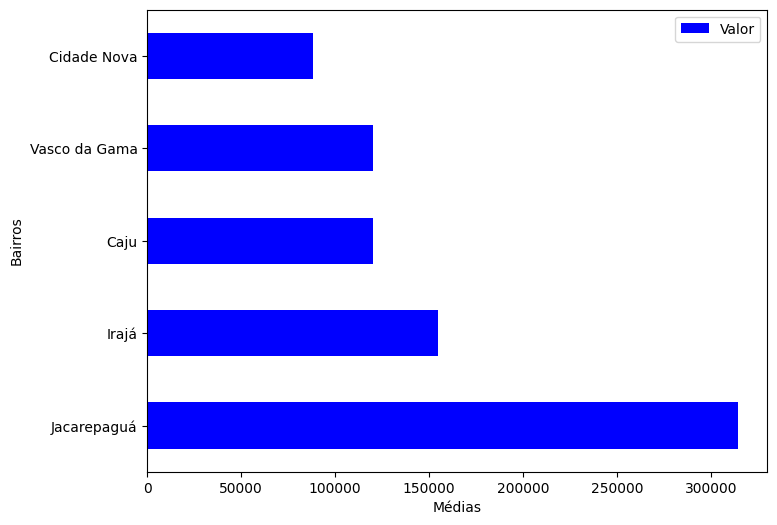

In [51]:
# Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

media_bairros = df_imoveis.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False).head()
media_bairros.plot(kind = 'barh', figsize = (8,6), color = 'blue', ylabel= 'Bairros', xlabel= 'Médias')

# Atividade 3

In [52]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'

dados = pd.read_csv(url)
dados.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [53]:
# Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

dados.isnull().sum()

,0
Nome,0
Idade,0
Notas,6
Aprovado,0


In [54]:
dados = dados.fillna(0)
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


In [55]:
# Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

alunos_removidos = dados.query('Nome == "Alice" | Nome == "Carlos"').index
dados.drop(alunos_removidos, axis = 0, inplace = True)
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


In [56]:
#  Aplique um filtro que selecione apenas os alunos que foram aprovados.

alunos_aprovados = dados.query('Aprovado == True')
alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [57]:
# Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

alunos_aprovados = alunos_aprovados.replace(7.0, 8.0)

In [58]:
alunos_aprovados.to_csv('alunos_aprovados.csv', index = False, sep = ';')
pd.read_csv('alunos_aprovados.csv', sep = ';')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,8.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,8.0,True
6,Nadia,34,8.0,True


# Atividade 4

In [60]:
#  Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles.
# Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'

dados_alunos = pd.read_csv(url)
dados_alunos.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


In [61]:
dados_alunos['Pontos_extras'] = dados_alunos['Notas'] * 0.4
dados_alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.00
1,Ana,18,NaN,False,NaN
2,Cátia,27,2.5,False,1.00
3,Denis,18,5.0,False,2.00
4,Beto,21,10.0,True,4.00
5,Bruna,23,NaN,False,NaN
6,Dara,21,7.0,True,2.80
7,Carlos,19,6.0,True,2.40
8,Alice,35,5.6,False,2.24
9,Vitor,28,NaN,False,NaN


In [62]:
# Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.

dados_alunos['Notas_finais'] = dados_alunos['Notas'] + dados_alunos['Pontos_extras']
dados_alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.00,10.50
1,Ana,18,NaN,False,NaN,NaN
2,Cátia,27,2.5,False,1.00,3.50
3,Denis,18,5.0,False,2.00,7.00
4,Beto,21,10.0,True,4.00,14.00
5,Bruna,23,NaN,False,NaN,NaN
6,Dara,21,7.0,True,2.80,9.80
7,Carlos,19,6.0,True,2.40,8.40
8,Alice,35,5.6,False,2.24,7.84
9,Vitor,28,NaN,False,NaN,NaN


In [65]:
#Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

#True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
#False: caso o aluno esteja reprovado (nota final deve ser menor que 6).

dados_alunos['Aprovados_final'] = dados_alunos['Notas'].apply(lambda x: True if x >= 6 else False)
dados_alunos

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovados_final
0,Ary,20,7.5,True,3.00,10.50,True
1,Ana,18,NaN,False,NaN,NaN,False
2,Cátia,27,2.5,False,1.00,3.50,False
3,Denis,18,5.0,False,2.00,7.00,False
4,Beto,21,10.0,True,4.00,14.00,True
5,Bruna,23,NaN,False,NaN,NaN,False
6,Dara,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,True,2.40,8.40,True
8,Alice,35,5.6,False,2.24,7.84,False
9,Vitor,28,NaN,False,NaN,NaN,False


In [67]:
# Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

dados_alunos.query('Aprovado == False & Aprovados_final == True')

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovados_final
